# Install of required package

This block only needs to be executed one to install the required packages in your python env.

In [1]:
# import sys
# !{sys.executable} -m pip uninstall smi-analysis --yes
# !{sys.executable} -m pip install git+https://github.com/gfreychet/smi-analysis.git
# !{sys.executable} -m pip uninstall saxs-nxformat --yes
# !{sys.executable} -m pip install git+https://github.com/CEA-MetroCarac/saxs_nxformat.git


Found existing installation: smi-analysis 0.1.0.post70+g87cab36
Uninstalling smi-analysis-0.1.0.post70+g87cab36:
  Successfully uninstalled smi-analysis-0.1.0.post70+g87cab36
  Cloning https://github.com/gfreychet/smi-analysis.git to c:\users\at280565\appdata\local\temp\pip-req-build-ig66w64n
  Resolved https://github.com/gfreychet/smi-analysis.git to commit 87cab36948499bc82bfef49101843bfc13014bb7
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for smi-analysis: started
  Running setup.py install for smi-analysis: finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/gfreychet/smi-analysis.git 'C:\Users\AT280565\AppData\Local\Temp\pip-req-build-ig66w64n'
  DEPRECATION: smi-analysis is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\dev\sw\envs3\env_metrocarac\Scripts\python.exe -m pip install --upgrade pip


Found existing installation: saxs_nxformat 2025.3
Uninstalling saxs_nxformat-2025.3:
  Successfully uninstalled saxs_nxformat-2025.3
  Cloning https://github.com/CEA-MetroCarac/saxs_nxformat.git to c:\users\at280565\appdata\local\temp\pip-req-build-6xbvxb1y
  Resolved https://github.com/CEA-MetroCarac/saxs_nxformat.git to commit 7d03b749f3c61df5b9951f617b02b6f0f2097c0a
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for saxs_nxformat: filename=saxs_nxformat-2025.3-py3-none-any.whl size=1297702 sha256=e7c655f0b57a508de36aada7b1153982ae8221303757cbbf476ae41b5eac009e
  Stored in directory: C:\Users\AT280565\AppData\Local\Temp\pip-ephem-wheel-cache-zlev0uh6\wheels\9a\20\74\052151babf4924ba5f32632d

  Running command git clone --filter=blob:none --quiet https://github.com/CEA-MetroCarac/saxs_nxformat.git 'C:\Users\AT280565\AppData\Local\Temp\pip-req-build-6xbvxb1y'

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\dev\sw\envs3\env_metrocarac\Scripts\python.exe -m pip install --upgrade pip


In [2]:
%matplotlib ipympl

import inspect
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import re

from pathlib import Path
from colorama import Fore, Style
from saxs_nxformat.class_nexus_file import NexusFile, save_data
from smi_analysis import SMI_beamline

# Inspecting your h5 file

This function can be used to visualize the structure of the HDF5 file.
There are three types of element :

    - Groups (red) : you can view them as a directory, it can contain other groups, dataset or attributes
    - Datasets (blue) : you can view them as a file, it can only contain attributes
    - Attributes (green) : you can view them as metadata, it cannot contain anything and gives additional information
    
You just have to pass the path of your data file in. Additionally you can choose wether you want to see what's in groups and what's inside datasets

In [3]:
def explore_file(group, explore_group=False, explore_dataset=False, level=0):
    indent = "|  " * level
    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            print(f"{indent}{Fore.RED}Group : {key}{Style.RESET_ALL}")
            explore_file(item, explore_group, explore_dataset, level + 1)
        elif isinstance(item, h5py.Dataset) and explore_group:
            print(f"{indent}{Fore.CYAN}Dataset : {key}{Style.RESET_ALL}")
            if item.attrs and explore_dataset:
                print(f"{indent}  {Fore.GREEN}Attributes : {key}{Style.RESET_ALL}")
                for key_attribute, item_attribute in item.attrs.items():
                    print(f"{indent}    - {key_attribute} : {item_attribute}")

# Specify the directory containing your data files

Change the variable **data_dir** to the path of the directory containing your data. The data needs to have the HDF5 format with the NeXus standard to work properly.

In [4]:
data_dir = r"C:\Users\AT280565\Desktop\Data Treatment Center\Treated Data\instrument - Xeuss\year - 2025\config ID - 2024-12-19T15-00\experiment - measure\detector - WAXS\format - NX"

path_list = []

for file in os.listdir(data_dir):
    print(file)
    path_list.append(os.path.join(data_dir, file))

Glassy_Carbon_img00001_20250307110503.h5
Glassy_Carbon_img00004_20250307110445.h5


# Processing using the NexusFile class

## Opening your files
To open your file, you need to use the NexusFile class, pass a list of the paths of all the data you want to treat. You can use the *do_batch* option to either treat your file one after the other (do_batch=False) or altogether (do_batch=True).

**Be carefull** : When you open files, you need to use the nexus_close() method in the same block to close the files properly 

In [5]:
nx_files = NexusFile(path_list, do_batch=True)
nx_files.nexus_close() # Very important !

## Getting more info on a method

You can get a lot of information on a particular method of the NexusFile class by using the show_method method.
By putting no parameters you only get a list of all the methods available in the class. if you put one of those name in the method it will show more info regarding that particular method

In [6]:
nx_files = NexusFile(path_list, do_batch=True)
print(nx_files.show_method())
print(nx_files.show_method("get_raw_data"))
nx_files.nexus_close()


__init__
_display_data
get_file
get_process_desc
get_raw_data
nexus_close
process_azimuthal_average
process_caking
process_delete_data
process_display
process_horizontal_integration
process_q_space
process_radial_average
process_vertical_integration
show_method
Please rerun this function and pass the name of one method as a parameter
to get more information concerning this particular method

get_raw_data
Docstring : 
        Get raw data of the group name. The parameter and intensity are returned as python dict :
            - key : file name
            - value : param | intensity

        Parameters
        ----------
        group_name :
            name of the group that contains the data to extract

        Returns
        -------
        2 dict :
            - The first one contains the parameter
            - The second one contains the intensity

        
    group_name='DATA_Q_SPACE'


## Viewing what's inside the HDF5 file

Now is the time to check what is in the .h5 file using the function explore_file defined earlier

In [7]:
explore_file(h5py.File(path_list[0]), False, False)

Group : ENTRY
|  Group : DATA
|  Group : DATA_CAKED
|  Group : DATA_Q_SPACE
|  Group : DATA_RAD_AVG
|  Group : DATA_RAD_AVG_NORM
|  Group : INSTRUMENT
|  |  Group : APERTURE
|  |  Group : COLLIMATOR
|  |  Group : DETECTOR
|  |  Group : SOURCE
|  Group : PROCESS_CAKED
|  Group : PROCESS_Q_SPACE
|  Group : PROCESS_RAD_AVG
|  Group : SAMPLE


## Displaying your data

Nativelly, raw data and some basic processes should be inside groups called DATA_..., which is itself in a group called ENTRY

If you want to see those datasets you can simply call the display method.

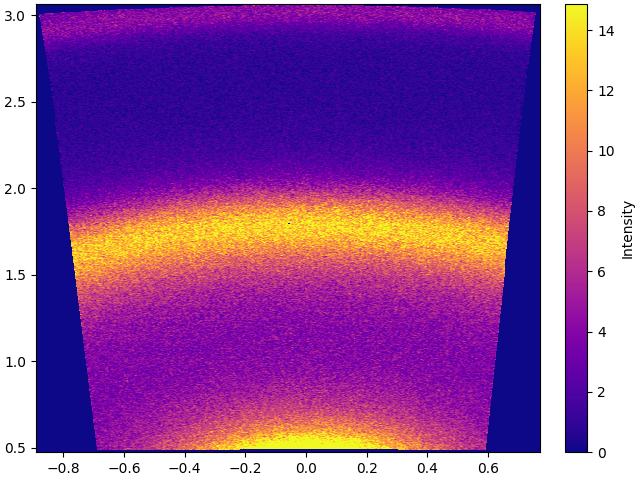

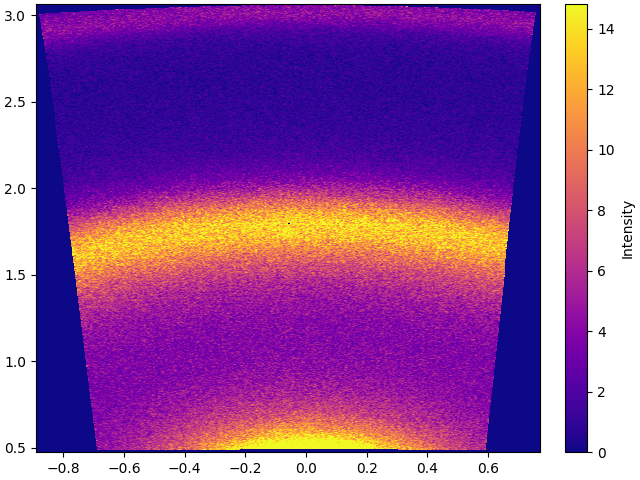

In [8]:
nx_files = NexusFile(path_list, do_batch=False)
nx_files.process_display(group_name="DATA_Q_SPACE")
nx_files.nexus_close()

## Applying premade processes

You can do more processes on your data by calling the other methods of the NexusFile class. let's do caking for example.

For most processes, you can display and/or save the processes data to your HDF5 file while keeping the raw data.

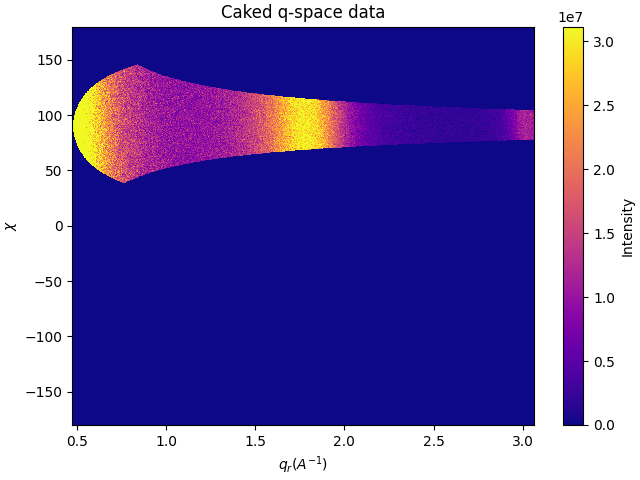

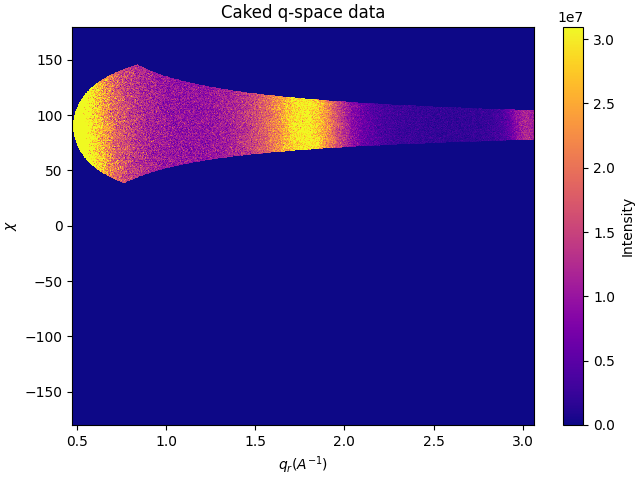

In [9]:
nx_files = NexusFile(path_list, do_batch=False)
nx_files.process_caking(display=True, save=True, group_name="DATA_CAKED")
nx_files.nexus_close()

In [10]:
explore_file(h5py.File(path_list[0]), False, False)

Group : ENTRY
|  Group : DATA
|  Group : DATA_CAKED
|  Group : DATA_Q_SPACE
|  Group : DATA_RAD_AVG
|  Group : DATA_RAD_AVG_NORM
|  Group : INSTRUMENT
|  |  Group : APERTURE
|  |  Group : COLLIMATOR
|  |  Group : DETECTOR
|  |  Group : SOURCE
|  Group : PROCESS_CAKED
|  Group : PROCESS_Q_SPACE
|  Group : PROCESS_RAD_AVG
|  Group : SAMPLE


As we can see, a new group called DATA_CAKED was created !
There is also an associated PROCESS_CAKED that was created

## Showing what's in PROCESS_...

You can display what's in PROCES_... by using the method get_process_desc. This method return a python dictionnary :
- The key is the name of the file
- The value is the description of the process for that particular file

Each process contains a short description of what is the process and what were the parameters used to get this particular result

In [11]:
nx_files = NexusFile(path_list, do_batch=False)
desc = nx_files.get_process_desc(group_name="PROCESS_CAKED")
print(type(desc))
for key, value in desc.items():
    print(key)
    print(value)
nx_files.nexus_close()

<class 'dict'>
Glassy_Carbon_img00001_20250307110503.h5
This process plots the intensity with respect to the azimuthal angle and the distance from the center of the q-space.
Parameters used :
   - Azimuthal range : [-180.0000, 180.0000] with 1000 points
   - Radial Q range : [0.4758, 3.0641] with 1000 points

Glassy_Carbon_img00004_20250307110445.h5
This process plots the intensity with respect to the azimuthal angle and the distance from the center of the q-space.
Parameters used :
   - Azimuthal range : [-180.0000, 180.0000] with 1000 points
   - Radial Q range : [0.4758, 3.0641] with 1000 points



## Getting raw data

Let's say we do the radial average but we would like to get the raw data to do some fitting or some other thing.
You can always get the raw data by using the method get_raw_data.

This method return 2 dictionnary :
- the first one contains the data of the parameter
- The second one contains the data of the measure

The key is the name of the file and the value is the data associated to this file

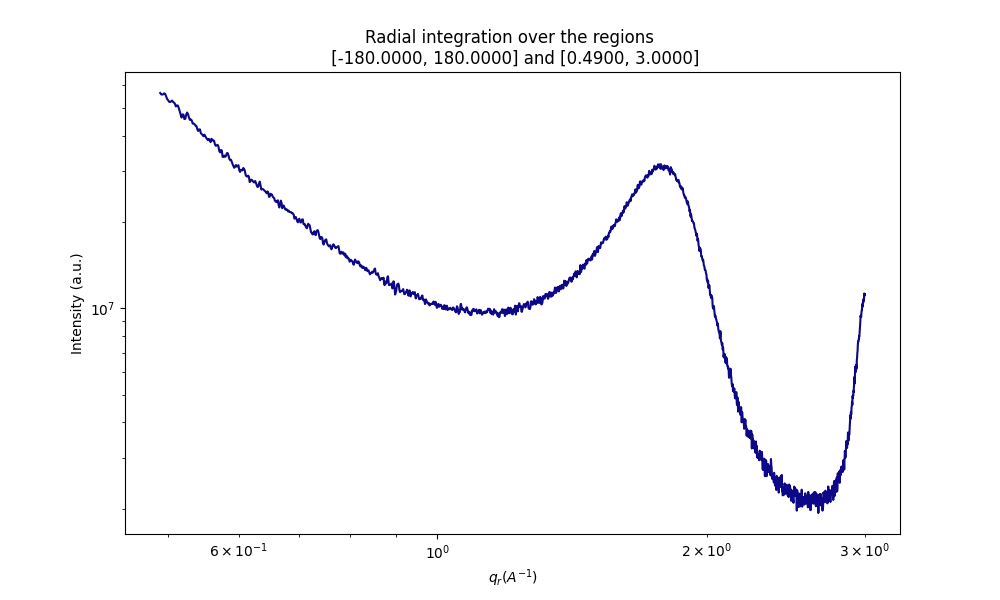

In [12]:
nx_files = NexusFile(path_list[0], do_batch=False)
nx_files.process_radial_average(display=True, save=True, r_min=0.49, r_max=3)
Q_dict, I_dict = nx_files.get_raw_data(group_name="DATA_RAD_AVG")
nx_files.nexus_close()

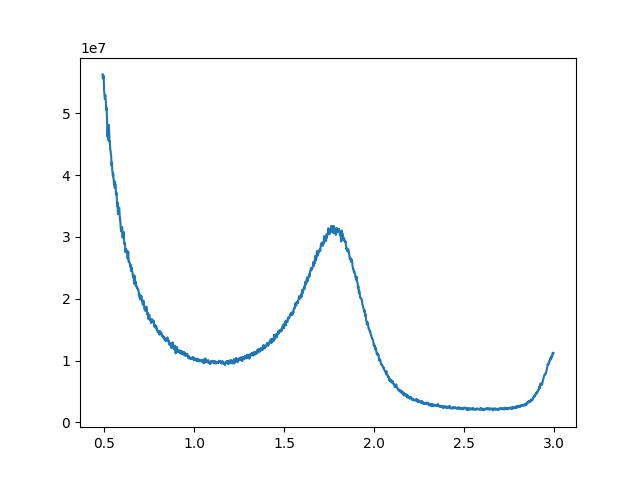

In [13]:
file_path = Path(path_list[0])
file_name = file_path.name
q_file1 = Q_dict[file_name]
i_file1 = I_dict[file_name]

plt.figure()
plt.plot(q_file1, i_file1)
plt.show()

# We do get the exact same data

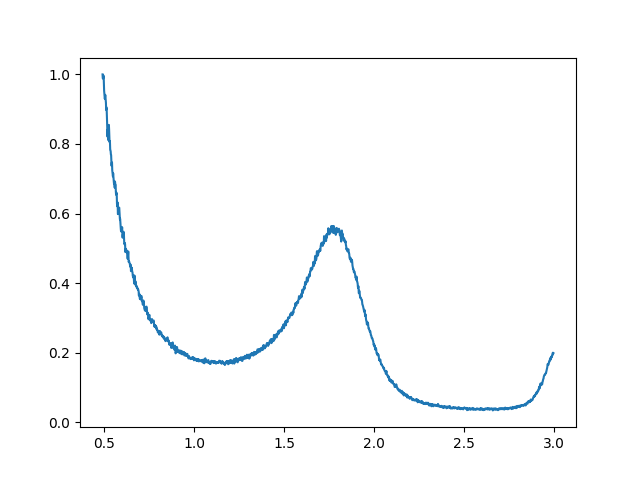

In [14]:
# For example we normalize the data
max_i = np.max(i_file1)
i_file1 = i_file1 / max_i

plt.figure()
plt.plot(q_file1, i_file1)
plt.show()


In [15]:
# We can then save the data by opening the nxfile
nx_file = h5py.File(path_list[0], "r+")
save_data(nx_file, "Q", q_file1, "DATA_RAD_AVG_NORM", i_file1, [])

In [16]:
# We can check that the data was succesfully saved
explore_file(h5py.File(path_list[0]), False, False)

Group : ENTRY
|  Group : DATA
|  Group : DATA_CAKED
|  Group : DATA_Q_SPACE
|  Group : DATA_RAD_AVG
|  Group : DATA_RAD_AVG_NORM
|  Group : INSTRUMENT
|  |  Group : APERTURE
|  |  Group : COLLIMATOR
|  |  Group : DETECTOR
|  |  Group : SOURCE
|  Group : PROCESS_CAKED
|  Group : PROCESS_Q_SPACE
|  Group : PROCESS_RAD_AVG
|  Group : SAMPLE


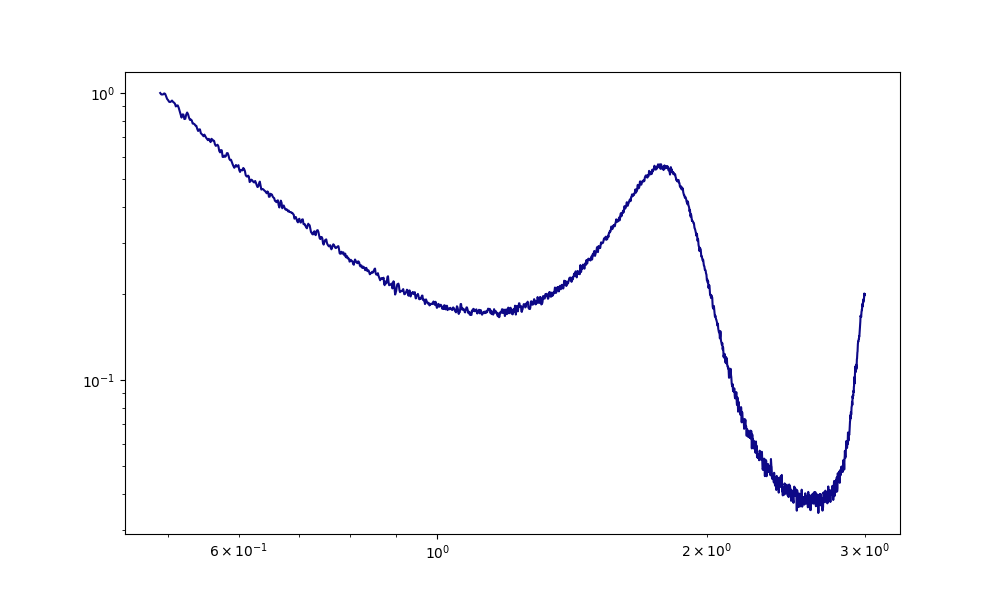

PermissionError: [WinError 32] Le processus ne peut pas accéder au fichier car ce fichier est utilisé par un autre processus: 'C:\\Users\\AT280565\\Desktop\\Data Treatment Center\\Treated Data\\instrument - Xeuss\\year - 2025\\config ID - 2024-12-19T15-00\\experiment - measure\\detector - WAXS\\format - NX\\Glassy_Carbon_img00001_20250307110503.h5'

In [17]:
nx_files = NexusFile(path_list[0], do_batch=False)
nx_files.process_display(group_name="DATA_RAD_AVG_NORM")
nx_files.nexus_close()